In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import numpy as np
import statistics
!pip install PyQt5
from PyQt5.QtWidgets import QWidget
from matplotlib.pyplot import figure

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 22.1 MB/s eta 0:00:00


## Objetivo da PokéAnálise:
- Explorar os poké-elementos do PokéBanco de Dados;

- Determinar possíveis padrões entre os pokédados, de forma a otimizar combos e speedruns <br>
de jogos de Pokémon que contemplem os pokémon presentes no Banco (até a sétima geração);

- Ver a quantidade de novos pokémon a cada geração;

- Descobrir a força e o balanceamento de cada tipo;

- Confirmar o power creep das novas gerações;

- Ilustrar tudo isso com pokétabelas e pokégráficos *astetics*;

In [ ]:
pokemon_db = pd.read_csv('pokemon.csv')

In [ ]:
pokemon_db.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
pokemon_db.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [ ]:
print("Shape: ", pokemon_db.shape)
print("\n Colunas: ", pokemon_db.columns)
print("\n Length: ", len(pokemon_db))

Shape:  (801, 41)

 Colunas:  Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

 Length:  801


array([[<Axes: title={'center': 'generation'}>]], dtype=object)

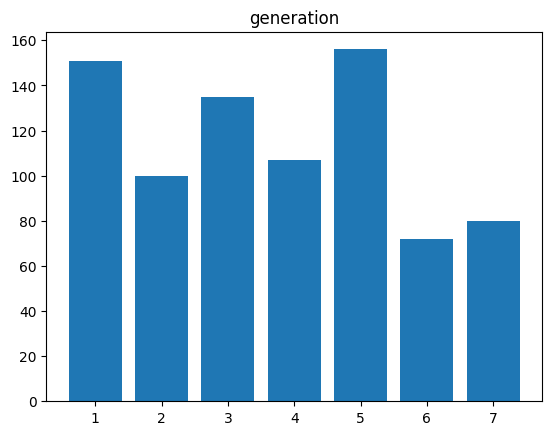

In [ ]:
#Número de pokémons por geração
pokemon_db.hist('generation', bins=np.arange(0.5, 8.5, 1), rwidth=0.8, grid=False)

In [22]:
# @title

#Deixa a lista numa ordem mais *Astetic*
ordemTypes = ["normal", "fire", "water", "grass", "electric", "ice", "fighting", "poison", "ground", "flying", "psychic", "bug", "rock", "ghost", "dragon", "dark", "steel", "fairy"]
typesNaoOrdenados = list(set(pokemon_db.type1))
types = [t for t in ordemTypes if t in typesNaoOrdenados]

# Dicionário pra tradução
tipoTraducao = {
    "normal": "Normal",
    "fire": "Fogo",
    "water": "Água",
    "grass": "Grama",
    "electric": "Elétrico",
    "ice": "Gelo",
    "fighting": "Lutador",
    "poison": "Veneno",
    "ground": "Terra",
    "flying": "Voador",
    "psychic": "Psíquico",
    "bug": "Inseto",
    "rock": "Pedra",
    "ghost": "Fantasma",
    "dragon": "Dragão",
    "dark": "Sombrio",
    "steel": "Aço",
    "fairy": "Fada"
}

# Traduzindo os tipos
tipos = [tipoTraducao[t] for t in types]

print(tipos)

['Normal', 'Fogo', 'Água', 'Grama', 'Elétrico', 'Gelo', 'Lutador', 'Veneno', 'Terra', 'Voador', 'Psíquico', 'Inseto', 'Pedra', 'Fantasma', 'Dragão', 'Sombrio', 'Aço', 'Fada']


In [ ]:
#Lista os nomes de todos os Pokémon
nomes = sorted(pokemon_db.name)
print(nomes)

['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Anorith', 'Araquanid', 'Arbok', 'Arcanine', 'Arceus', 'Archen', 'Archeops', 'Ariados', 'Armaldo', 'Aromatisse', 'Aron', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette', 'Barbaracle', 'Barboach', 'Basculin', 'Bastiodon', 'Bayleef', 'Beartic', 'Beautifly', 'Beedrill', 'Beheeyem', 'Beldum', 'Bellossom', 'Bellsprout', 'Bergmite', 'Bewear', 'Bibarel', 'Bidoof', 'Binacle', 'Bisharp', 'Blastoise', 'Blaziken', 'Blissey', 'Blitzle', 'Boldore', 'Bonsly', 'Bouffalant', 'Bounsweet', 'Braixen', 'Braviary', 'Breloom', 'Brionne', 'Bronzong', 'Bronzor', 'Bruxish', 'Budew', 'Buizel', 'Bulbasaur', 'Buneary', 'Bunnelby', 'Burmy', 'Butterfree', 'Buzzwole', 'Cacnea', 'Cacturne', 'Camerupt', 'Carbink', 'Carnivine', 'Carracosta', 'Carvanha', 'Cascoon', 'Castform', 'Caterpie'

In [ ]:
felicidade_media = {}
pokemon_por_tipo = {}
tipos_brutos = pokemon_db.type1

#Separa os Pokémon por tipos
for types in types:
    lista_tipo_atual = []
    for nome in nomes:
        if tipos_brutos[nomes.index(nome)] == types:
            lista_tipo_atual.append(nome)

    pokemon_por_tipo[tipoTraducao[types]] = lista_tipo_atual

In [ ]:
#Calcula a felicidade base média dos pokémon por tipo
for tipo, pokemon in pokemon_por_tipo.items():
    soma_felicidade_tipo = []
    print(tipo)
    for poke in pokemon:
        soma_felicidade_tipo.append(pokemon_db['base_happiness'][nomes.index(poke)])
        felicidade_media[tipo] = statistics.mean(soma_felicidade_tipo)
        felicidade_media = {tipoTraducao[tipo]: felicidade_media[tipoTraducao[tipo]] for tipo in ordemTypes if tipoTraducao[tipo] in felicidade_media}
    print(felicidade_media)

Normal
{'Normal': 69}
Fogo
{'Normal': 69, 'Fogo': 68}
Água
{'Normal': 69, 'Fogo': 68, 'Água': 67}
Grama
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67}
Elétrico
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68}
Gelo
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68, 'Gelo': 65}
Lutador
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68, 'Gelo': 65, 'Lutador': 70}
Veneno
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68, 'Gelo': 65, 'Lutador': 70, 'Veneno': 70}
Terra
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68, 'Gelo': 65, 'Lutador': 70, 'Veneno': 70, 'Terra': 68}
Voador
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68, 'Gelo': 65, 'Lutador': 70, 'Veneno': 70, 'Terra': 68, 'Voador': 76}
Psíquico
{'Normal': 69, 'Fogo': 68, 'Água': 67, 'Grama': 67, 'Elétrico': 68, 'Gelo': 65, 'Lutador': 70, 'Veneno': 70, 'Terra': 68, 'Voador': 76, 'Psíquico': 63}
Inseto
{'Normal': 69, 'Fogo': 6

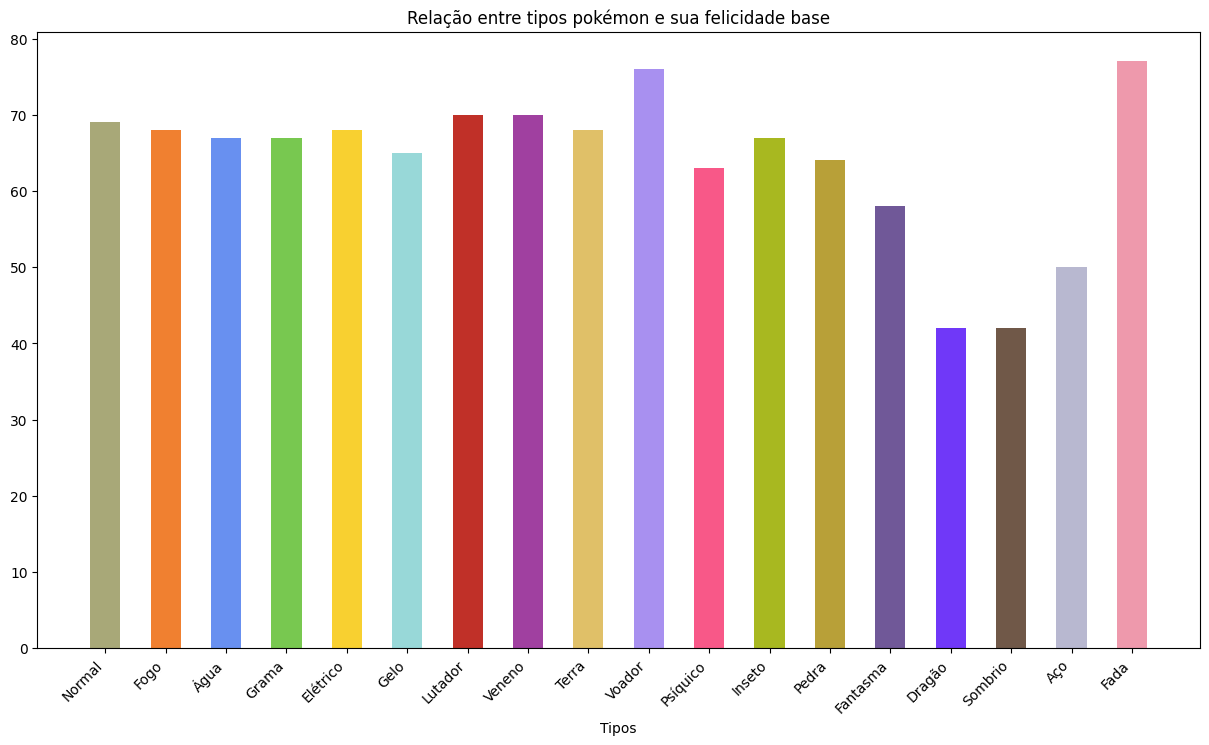

In [ ]:
#Gráfico mostrando a relação entre felicidade base e tipo
felicidades = list(felicidade_media.values())
cores = ['#A8A878', '#F08030', '#6890F0', '#78C850', '#F8D030', '#98D8D8', '#C03028', '#A040A0', '#E0C068', '#A890F0', '#F85888', '#A8B820', '#B8A038', '#705898', '#7038F8', '#705848', '#B8B8D0', '#EE99AC']

fig = plt.figure(figsize = (15, 8))
plt.bar(tipos, felicidades, width = 0.5, color=cores)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipos')
plt.title('Relação entre tipos pokémon e sua felicidade base')
plt.show()

In [ ]:
#Calcula a media de cada stat por tipo pokemon
hp_medio = {}
atk_medio = {}
def_media = {}
atkSp_medio = {}
defSp_media = {}
speed_media = {}
BST_medio = {}

for tipo, pokemon in pokemon_por_tipo.items():
    soma_hp_tipo = []
    soma_atk_tipo = []
    soma_def_tipo = []
    soma_atkSp_tipo = []
    soma_defSp_tipo = []
    soma_speed_tipo = []
    soma_BST_tipo = []

    print(tipo)
    for poke in pokemon:
        soma_hp_tipo.append(pokemon_db['hp'][nomes.index(poke)])
        soma_atk_tipo.append(pokemon_db['attack'][nomes.index(poke)])
        soma_def_tipo.append(pokemon_db['defense'][nomes.index(poke)])
        soma_atkSp_tipo.append(pokemon_db['sp_attack'][nomes.index(poke)])
        soma_defSp_tipo.append(pokemon_db['sp_defense'][nomes.index(poke)])
        soma_speed_tipo.append(pokemon_db['speed'][nomes.index(poke)])
        soma_BST_tipo.append(pokemon_db['base_total'][nomes.index(poke)])

    hp_medio[tipo] = statistics.mean(soma_hp_tipo)
    atk_medio[tipo] = statistics.mean(soma_atk_tipo)
    def_media[tipo] = statistics.mean(soma_def_tipo)
    atkSp_medio[tipo] = statistics.mean(soma_atkSp_tipo)
    defSp_media[tipo] = statistics.mean(soma_defSp_tipo)
    speed_media[tipo] = statistics.mean(soma_speed_tipo)
    BST_medio[tipo] = statistics.mean(soma_BST_tipo)

    print(atk_medio)

Normal
{'Normal': 75}
Fogo
{'Normal': 75, 'Fogo': 81}
Água
{'Normal': 75, 'Fogo': 81, 'Água': 73}
Grama
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73}
Elétrico
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70}
Gelo
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70, 'Gelo': 73}
Lutador
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70, 'Gelo': 73, 'Lutador': 99}
Veneno
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70, 'Gelo': 73, 'Lutador': 99, 'Veneno': 72}
Terra
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70, 'Gelo': 73, 'Lutador': 99, 'Veneno': 72, 'Terra': 94}
Voador
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70, 'Gelo': 73, 'Lutador': 99, 'Veneno': 72, 'Terra': 94, 'Voador': 66}
Psíquico
{'Normal': 75, 'Fogo': 81, 'Água': 73, 'Grama': 73, 'Elétrico': 70, 'Gelo': 73, 'Lutador': 99, 'Veneno': 72, 'Terra': 94, 'Voador': 66, 'Psíquico': 65}
Inseto
{'Normal': 75, 'Fogo': 8

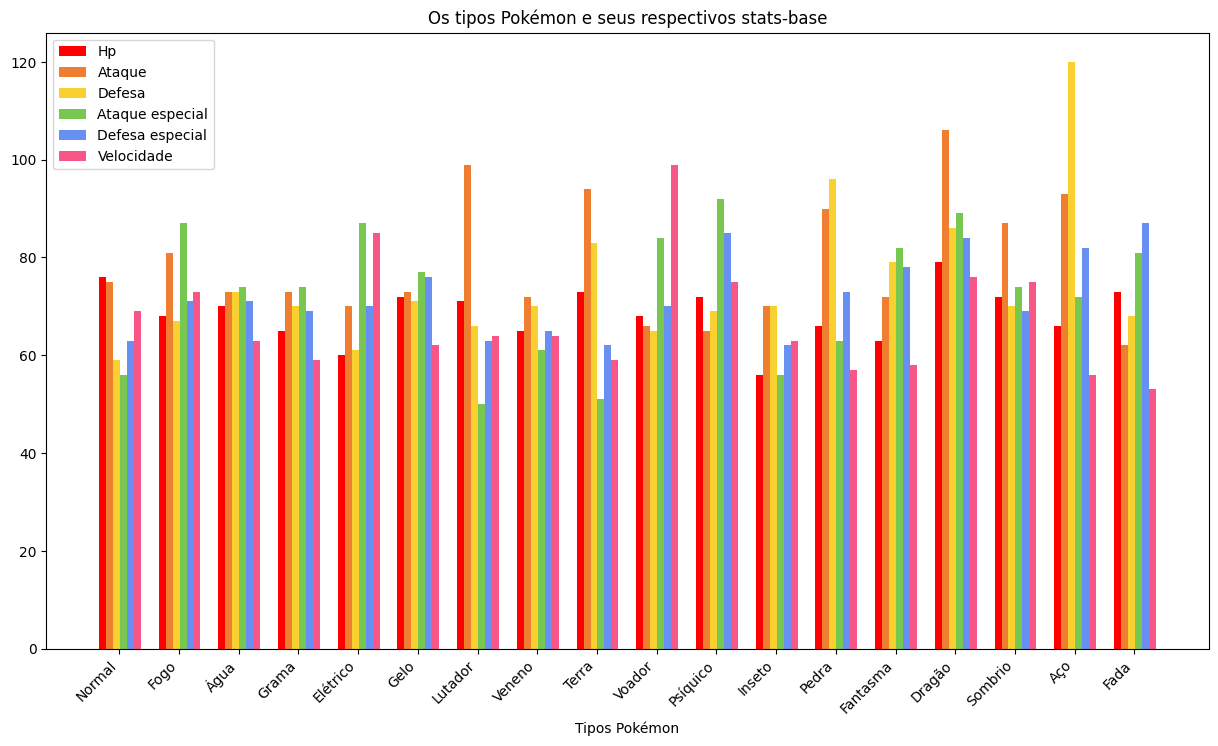

In [ ]:
#Gráfico dos stats e tipos
hps = list(hp_medio.values())
atks = list(atk_medio.values())
defs = list(def_media.values())
atkSps = list(atkSp_medio.values())
defSps = list(defSp_media.values())
speeds = list(speed_media.values())

colunas = tipos
linhas = np.array([hps, atks, defs, atkSps, defSps, speeds])

#Estilização do gráfico
x = np.arange(linhas.shape[1])
cores = ['#FE0000', '#EF7E30', '#F8D030', '#78C750', '#6890F2', '#F85687']
compr = 0.7/(linhas.shape[0])
fig = plt.figure(figsize = (15, 8))
for i in range(0, linhas.shape[0]):
    plt.xticks(x + compr*i - 0.3, colunas)
    plt.xticks(rotation=45, ha='right')
    plt.bar(x + compr*i, linhas[i], color=cores[i], width=compr)

#plt.bar(tipos, hps, width = 0.2, color = '#FE0000')
#plt.bar(tipos, atks, width = 0.2, color = '#EF7E30')
#plt.bar(tipos, defs, width = 0.2, color = '#F8D030')
#plt.bar(tipos, atkSps, width = 0.2, color = '#78C750')
#plt.bar(tipos, defSps, width = 0.2, color = '#6890F2')
#plt.bar(tipos, speeds, width = 0.2, color = '#F85687')
plt.legend(['Hp', 'Ataque', 'Defesa', 'Ataque especial', 'Defesa especial', 'Velocidade'])
plt.xlabel('Tipos Pokémon')
plt.title('Os tipos Pokémon e seus respectivos stats-base')
plt.show()

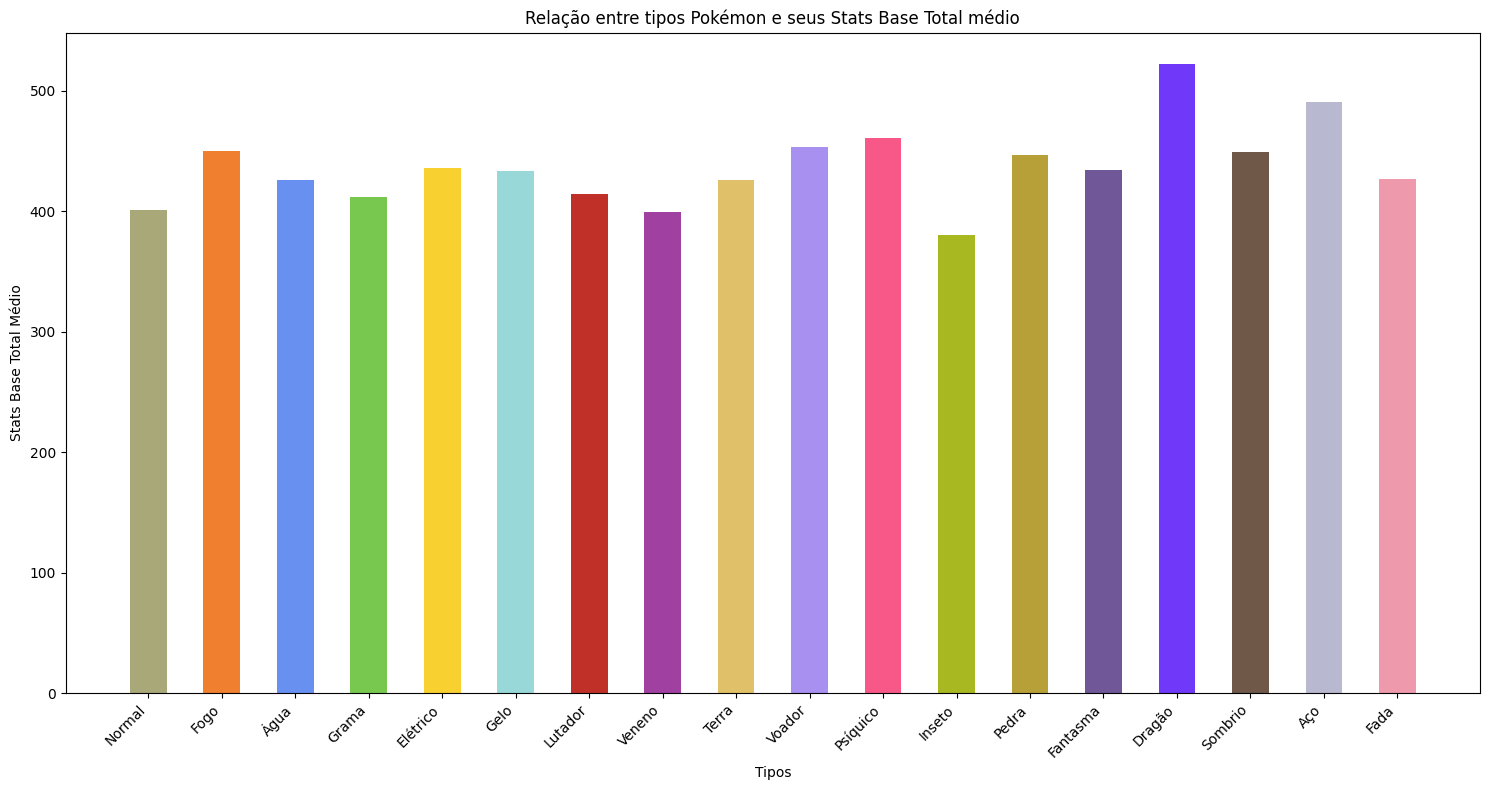

In [ ]:
#Gráfico para a Relação entre tipos Pokémon e seus Stats Base Total médio
baseStats_base = list(BST_medio.values())

cores = ['#A8A878', '#F08030', '#6890F0', '#78C850', '#F8D030', '#98D8D8', '#C03028', '#A040A0', '#E0C068', '#A890F0', '#F85888', '#A8B820', '#B8A038', '#705898', '#7038F8', '#705848', '#B8B8D0', '#EE99AC']
fig = plt.figure(figsize=(15, 8))
plt.bar(tipos, baseStats_base, width=0.5, color=cores)

plt.xlabel('Tipos')
plt.ylabel('Stats Base Total Médio')
plt.title('Relação entre tipos Pokémon e seus Stats Base Total médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

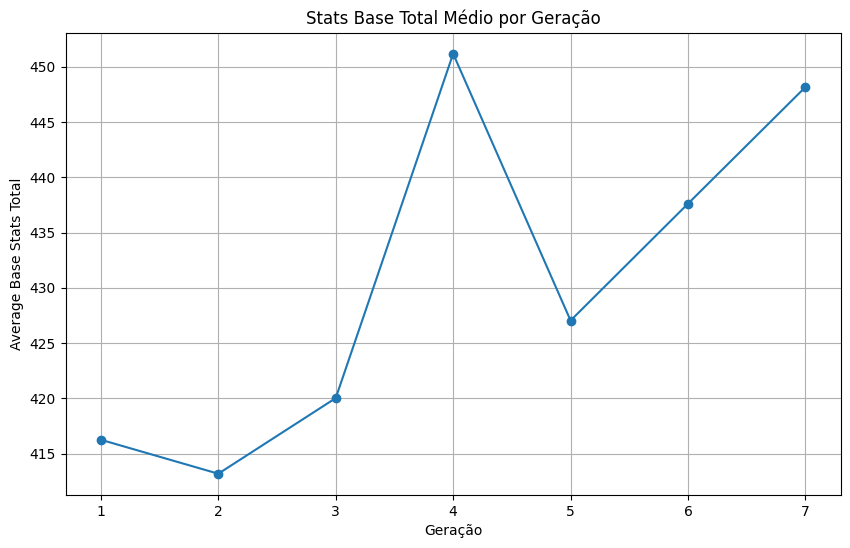

In [ ]:
#Gráfico mostrando o powercreep das gerações
stats_geracao = pokemon_db.groupby('generation')['base_total'].mean()

plt.figure(figsize=(10, 6))
plt.plot(stats_geracao.index, stats_geracao.values, marker='o')
plt.xlabel('Geração')
plt.ylabel('Average Base Stats Total')
plt.title('Stats Base Total Médio por Geração')
plt.xticks(stats_geracao.index)
plt.grid(True)
plt.show()